## Get the Data

In [1]:
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as zObject:
    zObject.extractall()

In [95]:
import numpy as np
import pandas as pd

In [3]:
demographic = pd.read_csv('Life Expectancy Data.csv')

### Take a Quick Glance at the Data

In [4]:
# There are null values in some columns. We need to fill the missing values.

demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

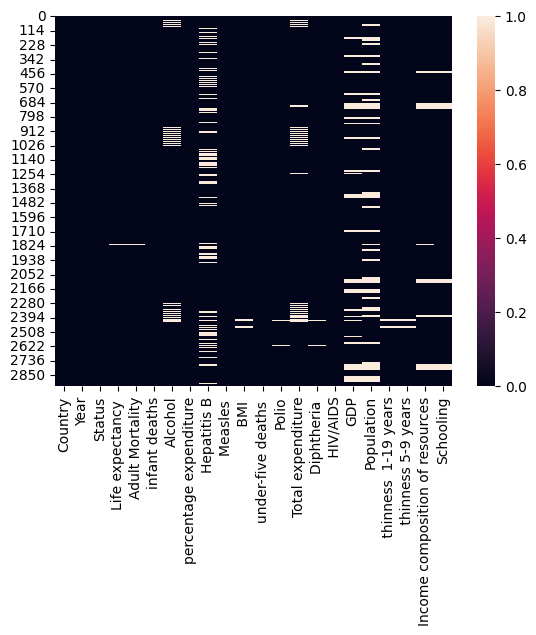

In [5]:
import seaborn as sns
sns.heatmap(pd.isnull(demographic))

In [6]:
# There are several rows for one country, so we'll use Binary Encoding.
# The range of values for most columns are not in the same range, so we need to re-scale the data.
demographic.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# There are 193 countries.
demographic["Country"].nunique()

193

In [8]:
# There are some leading and trailing spaces.
demographic.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
demographic.rename(columns = lambda x:x.replace(' ', ''), inplace = True)
demographic.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [10]:
# Status column could be one-hot encoded
demographic["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [11]:
# Take a glance at the data
demographic.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
# Check for missing values in the label column
demographic["Lifeexpectancy"].isnull().sum()

10

In [13]:
# Drop the rows containing null values in the label column as imputing them could introduce biases into the model
demographic = demographic.dropna(subset = ['Lifeexpectancy'])
demographic["Lifeexpectancy"].isnull().sum()

0

In [14]:
# There are 2928 rows but the last index is 2937 (not 2927).. We need to reset the index.
demographic

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
demographic = demographic.reset_index()
demographic

,index,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [38]:
demographic.drop("index", axis=1, inplace=True)

### Create a Test Set

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratify shuffle split on the Status column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(demographic, demographic["Status"]):
    strat_train_set = demographic.loc[train_index]
    strat_test_set = demographic.loc[test_index]

In [40]:
strat_train_set["Status"].value_counts() / len(strat_train_set)

Status
Developing    0.824936
Developed     0.175064
Name: count, dtype: float64

In [41]:
demographic["Status"].value_counts()/len(demographic)

Status
Developing    0.825137
Developed     0.174863
Name: count, dtype: float64

## Discover and Visualize the Data to Gain Insights

In [42]:
# create a copy of the data
demo_copy = strat_train_set.copy()

In [43]:
demo_copy

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
967,Gambia,2008,Developing,58.7,287.0,3,2.79,0.000000,98.0,0,...,96.0,5.95,96.0,3.0,NaN,NaN,8.6,8.5,0.426,8.6
811,Egypt,2004,Developing,69.0,176.0,57,0.16,0.000000,97.0,80,...,97.0,5.21,97.0,0.1,NaN,NaN,3.3,3.2,0.623,11.2
762,Djibouti,2005,Developing,58.6,318.0,2,1.23,12.703259,NaN,298,...,71.0,7.21,71.0,3.9,94.729749,783254.0,5.9,5.8,0.396,4.0
2850,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.71,0.000000,82.0,0,...,82.0,4.94,82.0,0.1,NaN,NaN,1.6,1.5,0.770,14.2
396,Bulgaria,2003,Developed,72.0,155.0,1,11.19,32.386161,96.0,0,...,96.0,7.43,96.0,0.1,271.468240,7775327.0,2.3,2.4,0.729,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,Micronesia (Federated States of),2004,Developing,67.7,179.0,0,2.02,0.000000,8.0,0,...,82.0,1.64,78.0,0.1,NaN,NaN,0.2,0.2,0.616,10.5
2765,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,87.0,4,11.44,0.000000,NaN,314,...,91.0,7.57,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
1148,Honduras,2003,Developing,71.9,166.0,6,3.04,194.433574,91.0,0,...,92.0,8.29,92.0,1.4,1157.342700,733821.0,2.6,2.5,0.566,10.3
2260,Serbia,2011,Developing,74.6,127.0,1,9.56,915.319079,94.0,370,...,94.0,9.72,94.0,0.1,6423.291783,723499.0,2.2,2.2,0.757,13.5


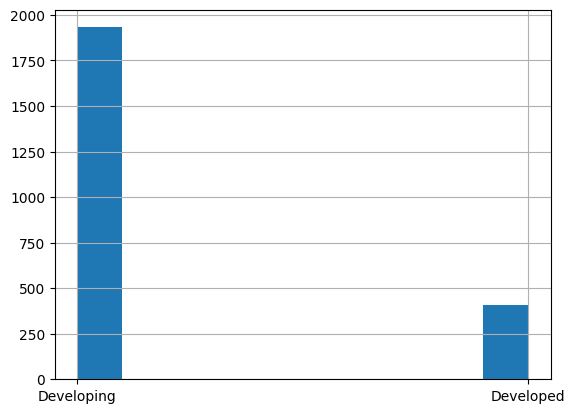

In [44]:
# Histogram of developing and developed countries
import matplotlib.pyplot as plt
demo_copy["Status"].hist()
plt.show()

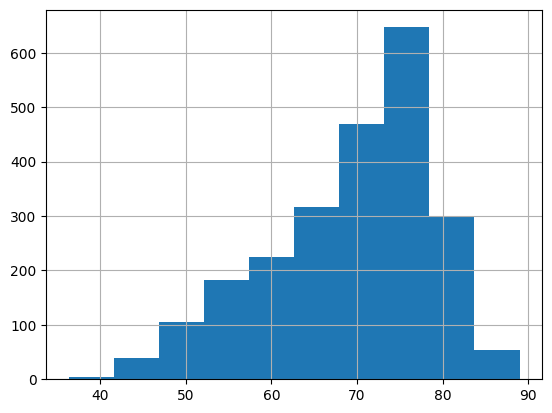

In [45]:
demo_copy["Lifeexpectancy"].hist()
plt.show()

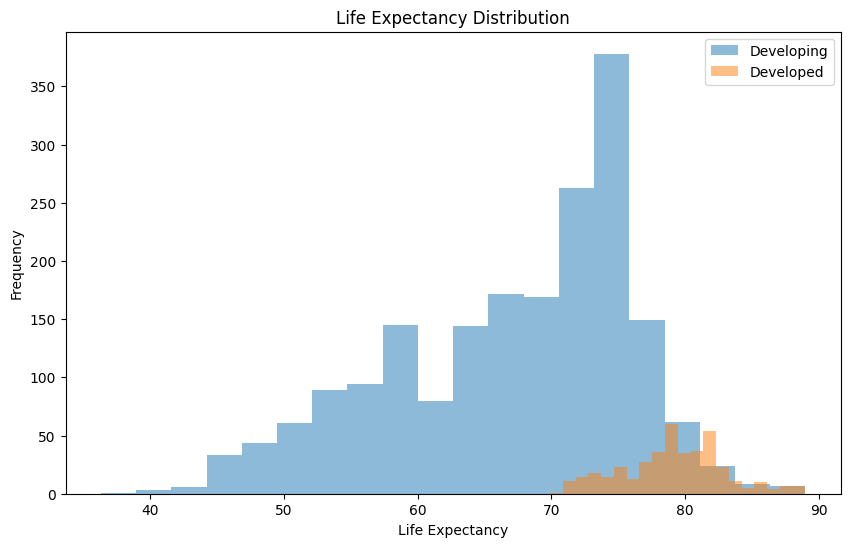

In [46]:
# Histograms with both developing and developed countries
# Filter data for developing and developed countries
developing = demo_copy[demo_copy["Status"] == "Developing"]["Lifeexpectancy"]
developed = demo_copy[demo_copy["Status"] == "Developed"]["Lifeexpectancy"]

# Plot histograms
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.hist(developing, bins=20, alpha=0.5, label='Developing')
plt.hist(developed, bins=20, alpha=0.5, label='Developed')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Life Expectancy Distribution')
plt.legend()
plt.show()

In [47]:
demo_copy_sorted = demo_copy.sort_values(by=['Country', 'Year'])

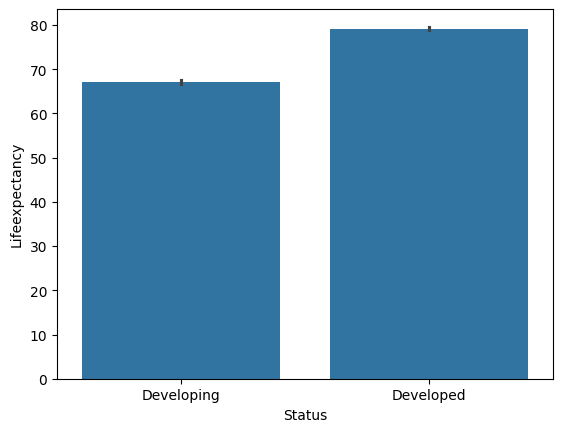

In [48]:
# The life expectancy of developed countries is higher than that of developing countries
sns.barplot(x = 'Status', y = 'Lifeexpectancy', data = demo_copy, estimator='mean')
plt.show()

In [27]:
# Life expectancy country wise
# for country, data in demo_copy_sorted.groupby('Country'):
#     plt.plot(data['Year'], data['Lifeexpectancy'], label=country)
# plt.show()

# Too messy

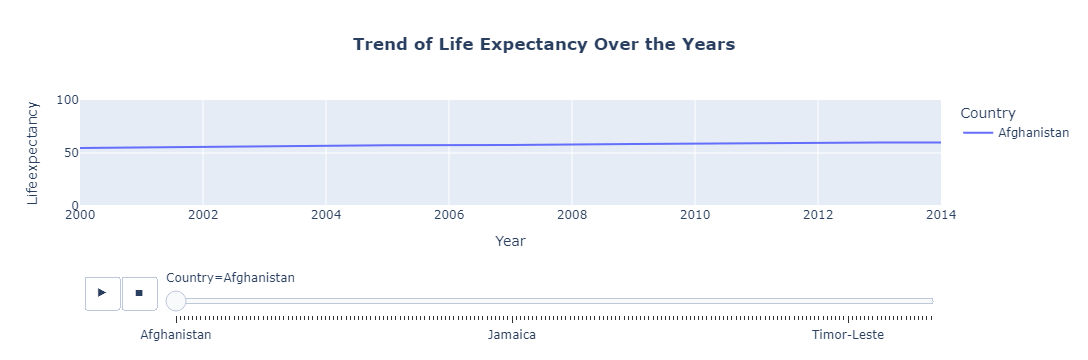

In [49]:
# Life expectancy country wise
import plotly.express as px
fig = px.line(demo_copy_sorted, 
              x='Year', 
              y='Lifeexpectancy',
              animation_frame='Country',
              animation_group='Year',
              color='Country',
              title='Trend of Life Expectancy Over the Years')
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5),
    yaxis=dict(range=[0, 100])  # Adjust the range based on your data
)
fig.show()

# Don't know why it's not working in jupyter .. works in VS code

### Looking for Correlations

In [50]:
corr_matrix = demo_copy.corr(numeric_only=True)

In [51]:
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
infantdeaths                   -0.190076
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpectancy, dtype: float64

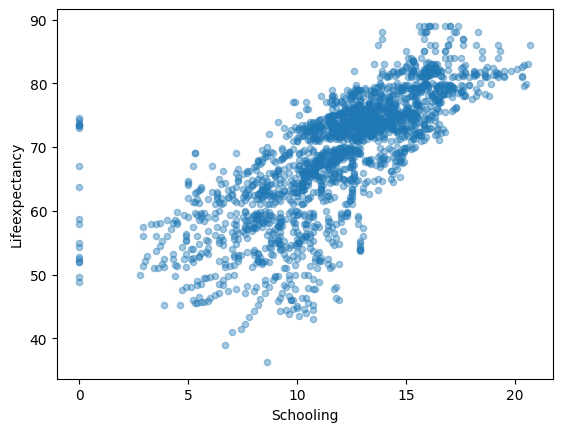

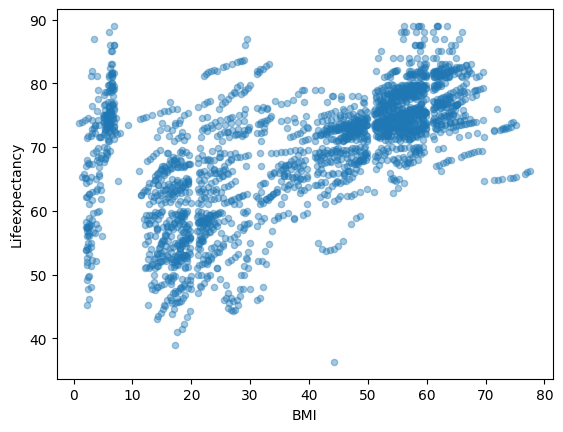

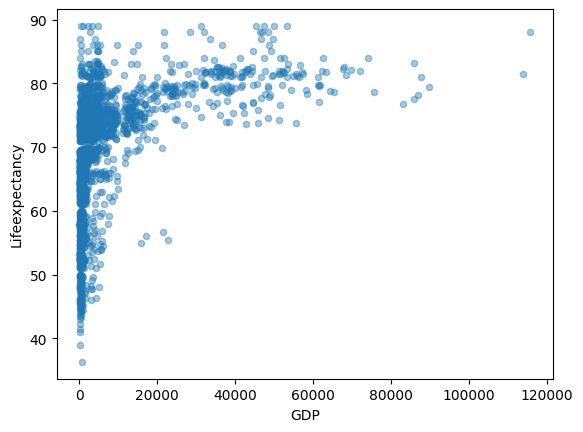

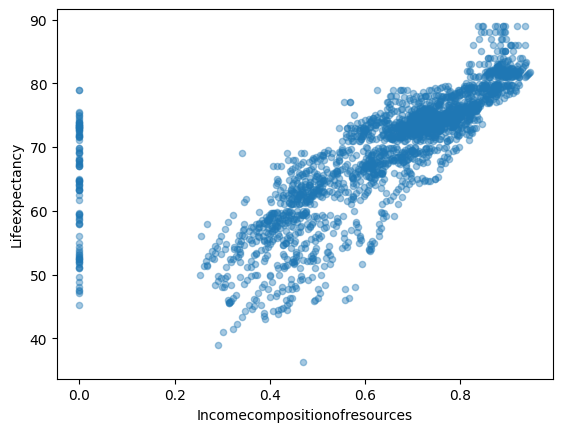

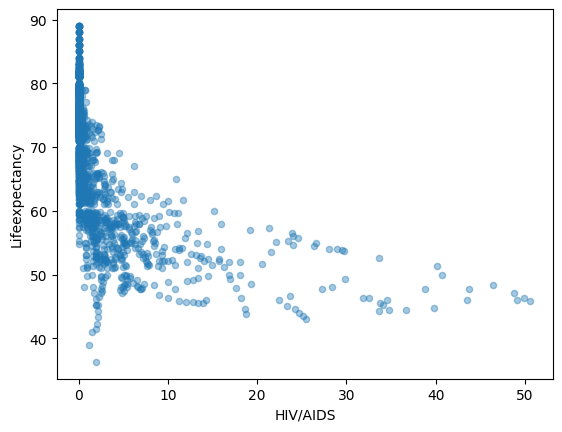

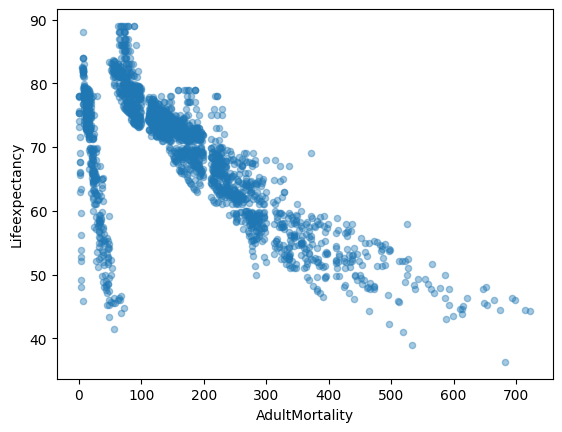

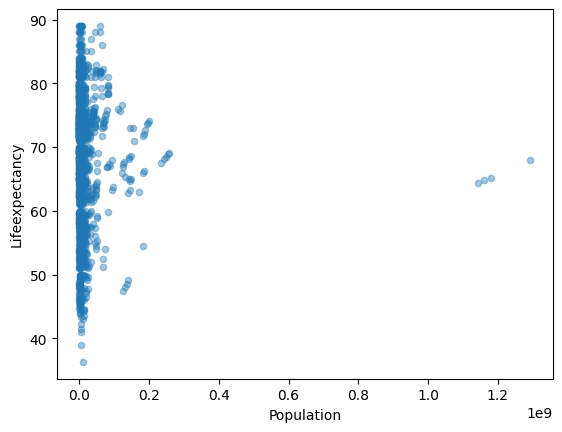

In [52]:
# Plotting histograms
# Observation
# High positive correlation with schooling, bmi, gdp, incomecompositon.. negative correlation with hiv/aids, adult mortality..
# negligble correlation with population
from pandas.plotting import scatter_matrix
attribs_interest = ["Schooling", "BMI", "GDP", "Incomecompositionofresources", "HIV/AIDS", "AdultMortality", "Population"]

for attr in attribs_interest:
    demo_copy.plot(kind = 'scatter', x = attr, y = "Lifeexpectancy", alpha=0.4)
plt.show()

### Experimenting with attributes combinations

In [53]:
pd.Series(demo_copy.columns)
# maybe we can think of combining some categories that are similar like HepatitisB, Polio, Diphtheria (immunization coverage),
# diseases (hiv/aids and measles), deaths (infant and under-five), etc

0                          Country
1                             Year
2                           Status
3                   Lifeexpectancy
4                   AdultMortality
5                     infantdeaths
6                          Alcohol
7            percentageexpenditure
8                       HepatitisB
9                          Measles
10                             BMI
11                under-fivedeaths
12                           Polio
13                Totalexpenditure
14                      Diphtheria
15                        HIV/AIDS
16                             GDP
17                      Population
18               thinness1-19years
19                thinness5-9years
20    Incomecompositionofresources
21                       Schooling
dtype: object

In [54]:
demo_copy[["under-fivedeaths", "infantdeaths"]]

,under-fivedeaths,infantdeaths
967,6,3
811,70,57
762,2,2
2850,10,9
396,1,1
...,...,...
1707,0,0
2765,4,4
1148,7,6
2260,1,1


In [55]:
demo_copy[["thinness1-19years", "thinness5-9years"]]

,thinness1-19years,thinness5-9years
967,8.6,8.5
811,3.3,3.2
762,5.9,5.8
2850,1.6,1.5
396,2.3,2.4
...,...,...
1707,0.2,0.2
2765,0.7,0.5
1148,2.6,2.5
2260,2.2,2.2


In [62]:
# Looking at the correlations, it looks like we can combine the thinness
# Possibly we can drop the Population column since it has very low correlation
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
Immunization                    0.384372
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
Diseases                       -0.164152
infantdeaths                   -0.190076
ChildDeaths                    -0.204926
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
Thinness                       -0.487418
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpect

In [57]:
demo_copy["Immunization"] = demo_copy["Diphtheria"] + demo_copy["Polio"] + demo_copy["HepatitisB"]
demo_copy["Diseases"] = demo_copy["HIV/AIDS"] + demo_copy["Measles"]
demo_copy["Thinness"] = demo_copy["thinness5-9years"] + demo_copy["thinness1-19years"]
demo_copy["ChildDeaths"] = demo_copy["infantdeaths"] + demo_copy["under-fivedeaths"]

In [58]:
corr_matrix = demo_copy.corr(numeric_only=True)
corr_matrix["Lifeexpectancy"].sort_values(ascending=False)

# Observation
# Immunization and Diseases doesn't have much correlation, so they will not be added
# But the correlation of ChildDeaths and Thinness is closer to the individual correlation of their sub-categories..
# So, we'll add them and drop the categories infantdeaths, under-fivedeaths, thinness5-9years, thinness1-19years

Lifeexpectancy                  1.000000
Schooling                       0.759035
Incomecompositionofresources    0.732218
BMI                             0.567489
Diphtheria                      0.474283
GDP                             0.465702
Polio                           0.462183
Alcohol                         0.402394
percentageexpenditure           0.384486
Immunization                    0.384372
HepatitisB                      0.256194
Totalexpenditure                0.197679
Year                            0.176061
Population                     -0.016937
Measles                        -0.163917
Diseases                       -0.164152
infantdeaths                   -0.190076
ChildDeaths                    -0.204926
under-fivedeaths               -0.215589
thinness5-9years               -0.477421
thinness1-19years              -0.481426
Thinness                       -0.487418
HIV/AIDS                       -0.557029
AdultMortality                 -0.698847
Name: Lifeexpect

## Prepare Data for Machine Learning Algorithms

In [59]:
# separate the labels and predictors
demographic = strat_train_set.drop("Lifeexpectancy", axis=1)
demographic_labels = strat_train_set["Lifeexpectancy"].copy()

### Data Cleaning

In [63]:
# Drop the population column
demographic.drop("Population", axis =1, inplace=True)

In [66]:
# Check what attributes have null values
demographic.isnull().sum()

Country                           0
Year                              0
Status                            0
AdultMortality                    0
infantdeaths                      0
Alcohol                         152
percentageexpenditure             0
HepatitisB                      450
Measles                           0
BMI                              26
under-fivedeaths                  0
Polio                            16
Totalexpenditure                179
Diphtheria                       16
HIV/AIDS                          0
GDP                             359
thinness1-19years                26
thinness5-9years                 26
Incomecompositionofresources    128
Schooling                       128
dtype: int64

In [74]:
# Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

demographic_num = demographic.select_dtypes(
    include=['int64', 'float64']
)

imputer.fit(demographic_num)
X = imputer.transform(demographic_num)
demographic_tr = pd.DataFrame(X, columns=demographic_num.columns, index=demographic_num.index)

### Handling text and categorical attributes

In [77]:
demographic_cat = demographic.select_dtypes(['object'])

In [78]:
demographic_cat.head()

,Country,Status
967,Gambia,Developing
811,Egypt,Developing
762,Djibouti,Developing
2850,Venezuela (Bolivarian Republic of),Developing
396,Bulgaria,Developed


### Custom Transformers

In [94]:
demographic.columns

Index(['Country', 'Year', 'Status', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness1-19years', 'thinness5-9years',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

cols = "thinness1-19years", "thinness5-9years", "under-fivedeaths", "infantdeaths"
thin119_idx, thin59_idx, under5_idx, infant_idx = [
    demographic.columns.get_loc(c) for c in cols
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        thinness = X[:, thin119_idx] + X[:, thin59_idx]
        child_deaths = X[:, under5_idx] + X[:, infant_idx]
        return np.c_[X, thinness, child_deaths]

In [125]:
# cols = "Country", "Status"
# country_idx, status_idx = [
#     demographic.columns.get_loc(c) for c in cols
# ]

# class FeatureEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
#     def fit(self, X):
#         return self
#     def transform(self, X):
#         binary_encoder = BinaryEncoder()
#         one_hot_encoder = OneHotEncoder()
#         binary_encoder.fit_transform(X[country_idx])
#         one_hot_encoder.fit_transform(X[status_idx])
        

### Feature Scaling and Transformation Pipelines

In [105]:
num_attribs = list(demographic_num)
cat_attribs = list(demographic_cat)

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for numeric columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [130]:
# Create a pipeline for both numeric and non-numeric columns
from sklearn.compose import ColumnTransformer
# Let's binary encode the countries and onehot encode the status
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('binary_encode', BinaryEncoder(), [cat_attribs[0]]),
    ('one_hot_eoncode', OneHotEncoder(), [cat_attribs[1]])
])

In [131]:
demographic_prepared = full_pipeline.fit_transform(demographic)